## Plot results of mutation detection experiments

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config as cfg
%matplotlib inline

In [28]:
genes = ['TP53', 'PTEN', 'PIK3CA', 'KRAS', 'TTN']
# genes = ['TP53', 'TTN']
results_dir = os.path.join(cfg.repo_root, 'results', 'mutation')
df = None
for gene_name in genes:
    results_file = os.path.join(os.path.abspath(results_dir),
                                gene_name,
                                '{}_classify_metrics.tsv.gz'.format(gene_name))
    results_df = pd.read_csv(results_file, sep='\t')
    if df is None:
        df = results_df
    else:
        df = pd.concat((df, results_df))
df = df[df['data_type'] == 'cv']
df.head(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
2,0.76460,0.72502,TP53,signal,20,121958,nmf,cv
5,0.76953,0.73408,TP53,signal,20,259178,nmf,cv
8,0.76934,0.73380,TP53,signal,20,365838,nmf,cv
11,0.76902,0.73163,TP53,signal,20,671155,nmf,cv
14,0.76944,0.73439,TP53,signal,20,131932,nmf,cv
17,0.88987,0.85995,TP53,signal,200,121958,nmf,cv
20,0.88829,0.85523,TP53,signal,200,259178,nmf,cv
23,0.88589,0.85555,TP53,signal,200,365838,nmf,cv
26,0.88906,0.85834,TP53,signal,200,671155,nmf,cv
29,0.88817,0.85711,TP53,signal,200,131932,nmf,cv


/home/jake/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


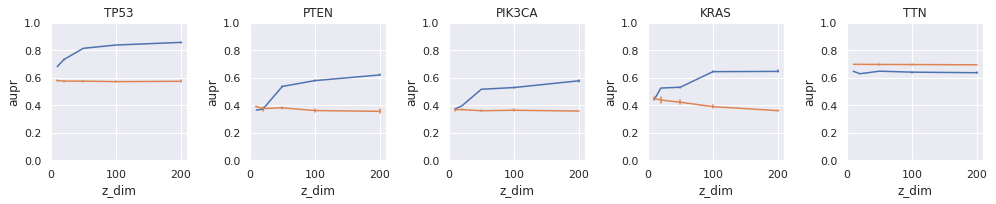

In [30]:
sns.set()
fig, axarr = plt.subplots(1, 5)
fig.set_figwidth(14)
fig.set_figheight(3)
for ix, gene_name in enumerate(genes):
    ax = axarr[ix]
    gene_df = df[df['gene_or_cancertype'] == gene_name]
    sns.lineplot(data=gene_df, x='z_dim', y='aupr', hue='signal', 
                 err_style='bars', ax=ax)
    ax.set_ylim((0.0, 1.0))
    ax.get_legend().remove()
    ax.set_title(gene_name)
plt.tight_layout()